#### 
# Heart Failure Prediction System
***
## Phase 1: Data Cleansing and Exploration

#### 
## Table of Contents
***
* [Introduction](#Introduction) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Variables](#Dataset-Variables)
  + [Response Variable](#Response-Variable)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing) 
  + [Data Retrieval](#Data-Retrieval)
  + [Data Cleaning](#Data-Cleaning)
  + [Random Sampling](#Random-Sampling)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
  + [Univariate Visualisation](#Univariate-Visualisation)
  + [Two-Variable Visualisation](#Two-Variable-Visualisation)
  + [Multi-Variable Visualisation](#Multi-Variable-Visualisation)
* [Literature Review](#Literature-Review)
* [Summary and Conclusions](#Summary-and-Conclusions)
* [References](#References)

#### 
## Introduction <a id='Introduction'></a>
***

### Dataset Source <a id='Dataset-Source'></a>

This dataset can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### Dataset Details <a id='Dataset-Details'></a>

This dataset is used to predict whether a patient is likely to get heart failure based on 14 input parameters. Each parameter provides relavant information about the patient, for instance; gender, age, exercise angina, and cholesterol. This dataset has a total of 303 observations. 


### Dataset Variables <a id='Dataset-Variables'></a>

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [1]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
        ['age','Numerical','Years','Age of the patient'],
        ['sex','Binary','NA','Sex of the patient'],
        ['cp','Numerical','NA','Chest pain type: \n  0: Typical Angina,\n  1: Atypical Angina, \n  2: Non-Anginal Pain, \n  3: Asymptomatic'],
        ['trtbps','Numerical','mm Hg','Resting blood pressure'],
        ['chol','Numerical','mm/dl','Serum cholesterol'],
        ['fbs','Binary','NA','Fasting blood sugar > 120 mg/dl: \n  1: True, \n  0: False'],
        ['restecg','Numerical','NA','Resting electrocardiography results: \n  0: Normal, \n  1: Having ST-T wave abnormality (ST elevation or depression of > 0.05 mV), \n  2: Left ventricular hypertrophy'],
        ['thalachh','Numerical','bpm','Maximum heart rate achieved'],
        ['exng','Binary','NA','Exercise-induced angina: \n  1: Yes, \n  0: No'],
        ['oldpeak','Numerical','NA','ST depression induced by exercise relative to rest'],
        ['slp','Numerical','NA','The slope of the peak exercise ST segment: \n  0: Upsloping, \n  1: Flat, \n  2: Downsloping'],
        ['caa','Numerical', 'NA', 'Number of major vessels colored by fluoroscopy'],
        ['thall', 'Numerical', 'NA','Thalassemia stress result, \n  1: Fixed defect (no blood flow in some part of the heart), \n  2: Normal blood flow, \n  3: Reversible defect (a blood flow is observed but it is not normal)'],
        ['output','Binary','NA','Heart disease: \n  1: Yes, \n  0: No']]
        

print(tabulate(table, headers='firstrow', tablefmt='simple'))

Name      Data Type    Units    Description
--------  -----------  -------  -----------------------------------------------------------------------------
age       Numerical    Years    Age of the patient
sex       Binary       NA       Sex of the patient
cp        Numerical    NA       Chest pain type:
                                  0: Typical Angina,
                                  1: Atypical Angina,
                                  2: Non-Anginal Pain,
                                  3: Asymptomatic
trtbps    Numerical    mm Hg    Resting blood pressure
chol      Numerical    mm/dl    Serum cholesterol
fbs       Binary       NA       Fasting blood sugar > 120 mg/dl:
                                  1: True,
                                  0: False
restecg   Numerical    NA       Resting electrocardiography results:
                                  0: Normal,
                                  1: Having ST-T wave abnormality (ST elevation or depression of > 0.05 mV),
    

### Response Variable <a id='Response-Variable'></a>

'output' targets the chances of heart attack and will be the response variable for this project.

#### 
## Goals and Objectives <a id='Goals-and-Objectives'></a>
***

Every day, the average human heart beats around 100,000 times, pumping 2,000 gallons of blood through the body, making the heart  heart a vital organ. Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 14 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help. The intend of this regression study is to create a model to assess the likelihood of a death by heart failure event. This can be used to help hospitals in assessing the severity of patients with cardiovascular diseases.

#### 
## Data Cleaning and Preprocessing <a id='Data-Cleaning-and-Preprocessing'></a>
***

In this section, the data cleaning and preprocessing steps undertaken for this project are described.

### Data Retrieval<a id='Data-Retrieval'></a>

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###

# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, please run the code chunk below
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# Name of the dataset to be imported
df = 'Phase1_Group76.csv'

In [4]:
df = pd.read_csv('Phase1_Group76.csv')

Shape of the dataset:

In [5]:
df.shape

(303, 14)

In [6]:
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1


Check if the feature types match the description outlined in the documentation.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Data Cleaning <a id='Data-Cleaning'></a>

*   Check and rename/ modify some column names
*   Check for missing values/ duplicated values
*   Drop irrelevant features in our dataset
*   Random sampling if needed

Display all the columns in our dataset.

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Rename columns names for readability and usability purposes. 

In [9]:
columns_mapping = {
    'cp': 'chestpain',
    'trtbps': 'restbp',
    'fbs': 'fastbs',
    'thalachh': 'maxhr',
    'exng': 'exangina',
    'oldpeak': 'oldpeak',
    'slp': 'stslope',
    'output': 'heartdisease'
}


df = df.rename(columns = columns_mapping)
df.sample(5, random_state = 999)

,age,sex,chestpain,restbp,chol,fastbs,restecg,maxhr,exangina,oldpeak,stslope,caa,thall,heartdisease
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1
128,52,0,2,136,196,0,0,169,0,0.1,1,0,2,1
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1


Check null values within each one of the columns:

In [10]:
df.isnull().sum()

age             0
sex             0
chestpain       0
restbp          0
chol            0
fastbs          0
restecg         0
maxhr           0
exangina        0
oldpeak         0
stslope         0
caa             0
thall           0
heartdisease    0
dtype: int64

Check duplicated values:

In [11]:
df[df.duplicated()]

,age,sex,chestpain,restbp,chol,fastbs,restecg,maxhr,exangina,oldpeak,stslope,caa,thall,heartdisease
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


On surface, no attribute contains any missing values, thus no roes need to be dropped for this reason. There seem to be one duplicated value that will need to be dropped.

In [12]:
df.drop_duplicates(keep = 'first', inplace = True)
df[df.duplicated()]

,age,sex,chestpain,restbp,chol,fastbs,restecg,maxhr,exangina,oldpeak,stslope,caa,thall,heartdisease


Check unique values within the attributes:

In [13]:
df.nunique()

age              41
sex               2
chestpain         4
restbp           49
chol            152
fastbs            2
restecg           3
maxhr            91
exangina          2
oldpeak          40
stslope           3
caa               5
thall             4
heartdisease      2
dtype: int64

There seems to be 4 different data types within the 'thall' attribute, but just 3 have been identify on the table above. For accuracy the 'thall' attribute could be dropped, but for learning academic purposes this attribute is kept. No other irrelevant features to be dropped within the dataset.

In [14]:
# df.drop(['thall'], 1, inplace = True)

Summary statistics: 

In [15]:
df.describe(include = 'int64')

,age,sex,chestpain,restbp,chol,fastbs,restecg,maxhr,exangina,stslope,caa,thall,heartdisease
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,2.000000,4.000000,3.000000,1.000000


### Random Sampling <a id='Random-Sampling'></a>

As the data has less than 5000 rows, no random sampling is required.

#### 
## Data Exploration and Visualisation <a id='Data-Exploration-and-Visualisation'></a>
***

The dataset is now considered to be clean, and ready to start data visualization and explore each of the data types.

### Univariate Visualisation <a id='Univariate-Visualisation'></a>

#### Bar Chart  of Heart Failure by patient

Begin by analyzing our target feature. In the graphic below (Figure 1.1), it is displayed that around 160 patients within the dataset have not had heart disease against 140 who have.

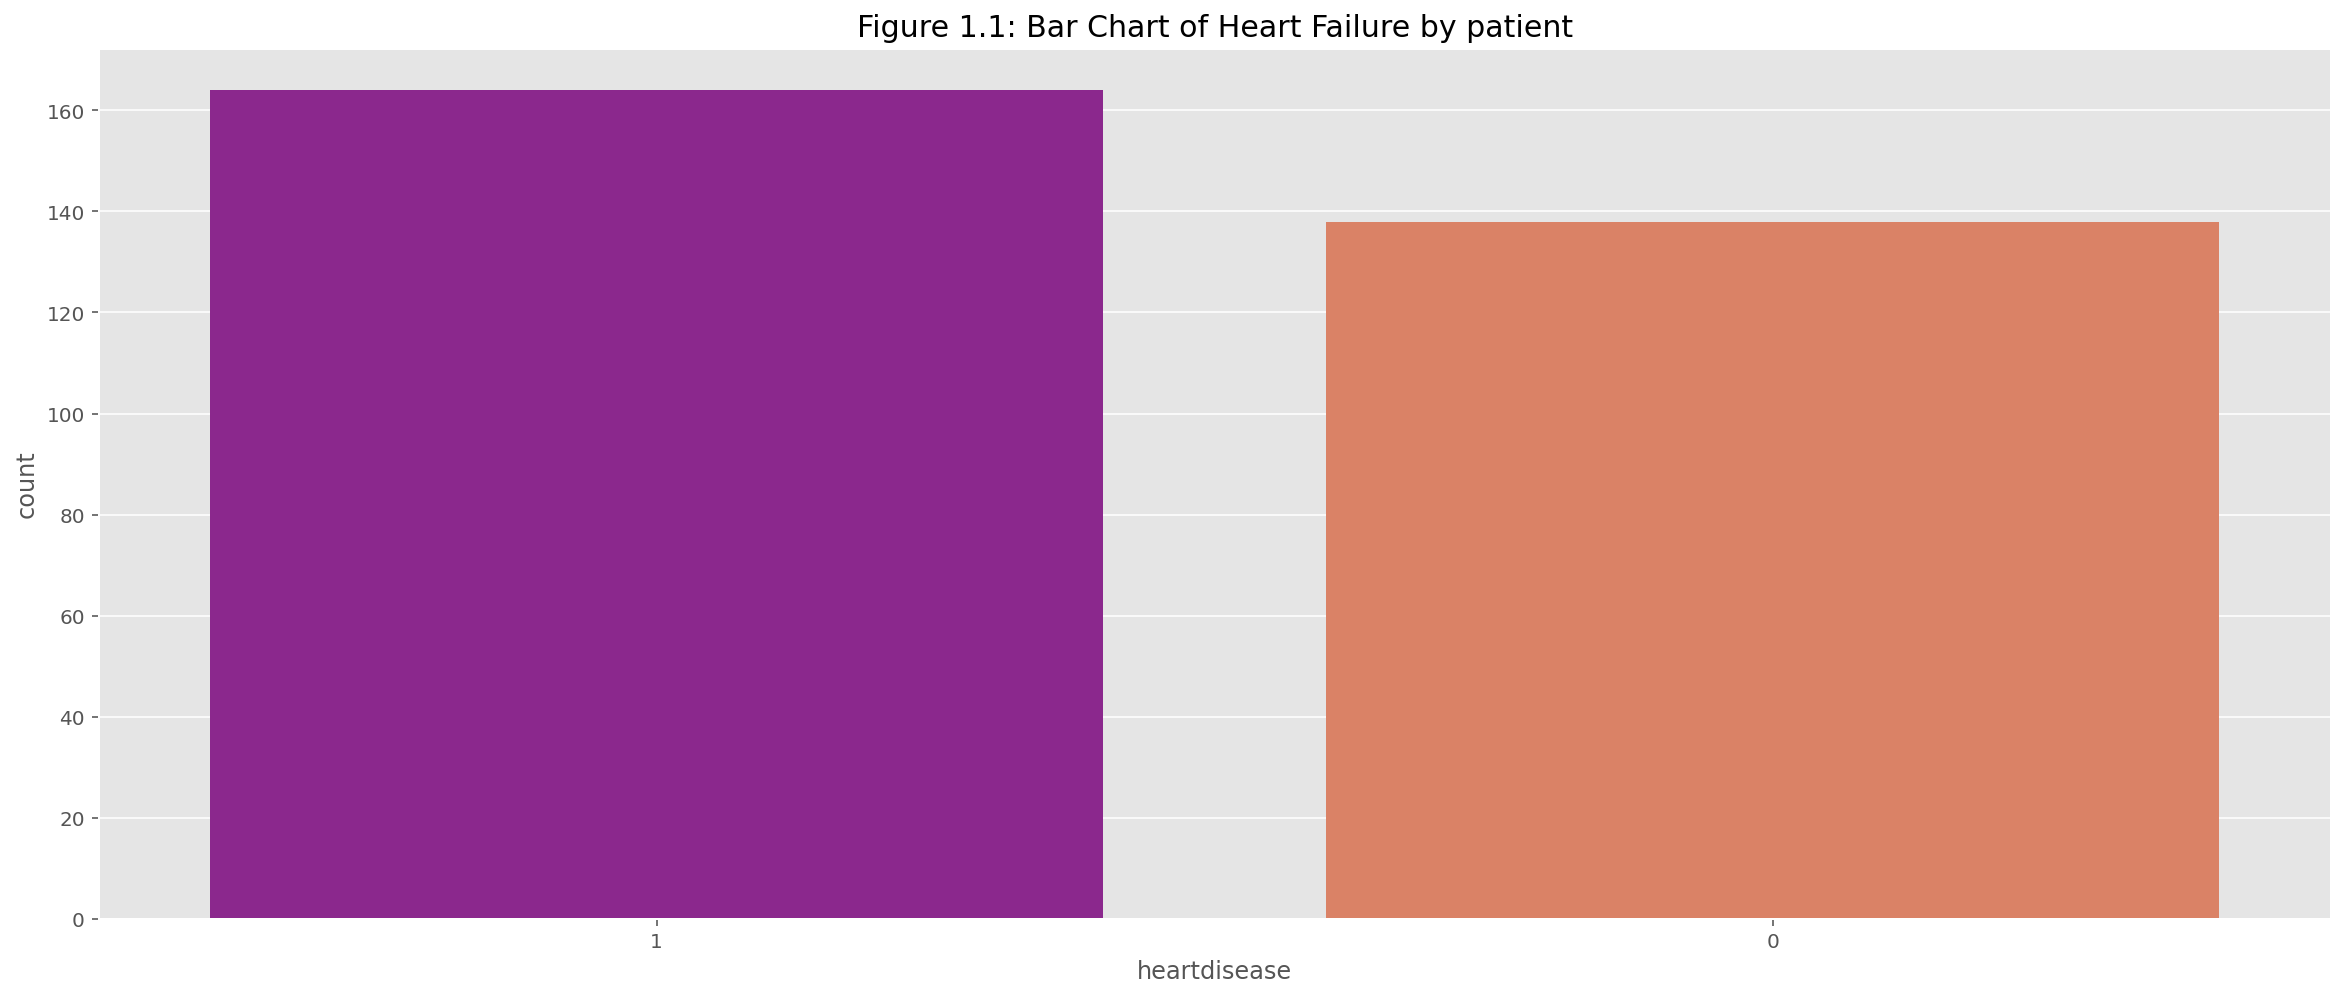

In [16]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'heartdisease', data = df, palette = 'plasma',
                    order = df['heartdisease'].value_counts().index)
fig = plt.title('Figure 1.1: Bar Chart of Heart Failure by patient', fontsize = 15)
plt.show()

#### Bar Chart of Electrocardiogram Results

From Figure 1.2, it is appreciated from all electrocardiograms conducted that around 95% of patients have had either a normal results or a ST-T wave abnormality. The remaining 5% of results are associated with a ventricular hypertrophy result.

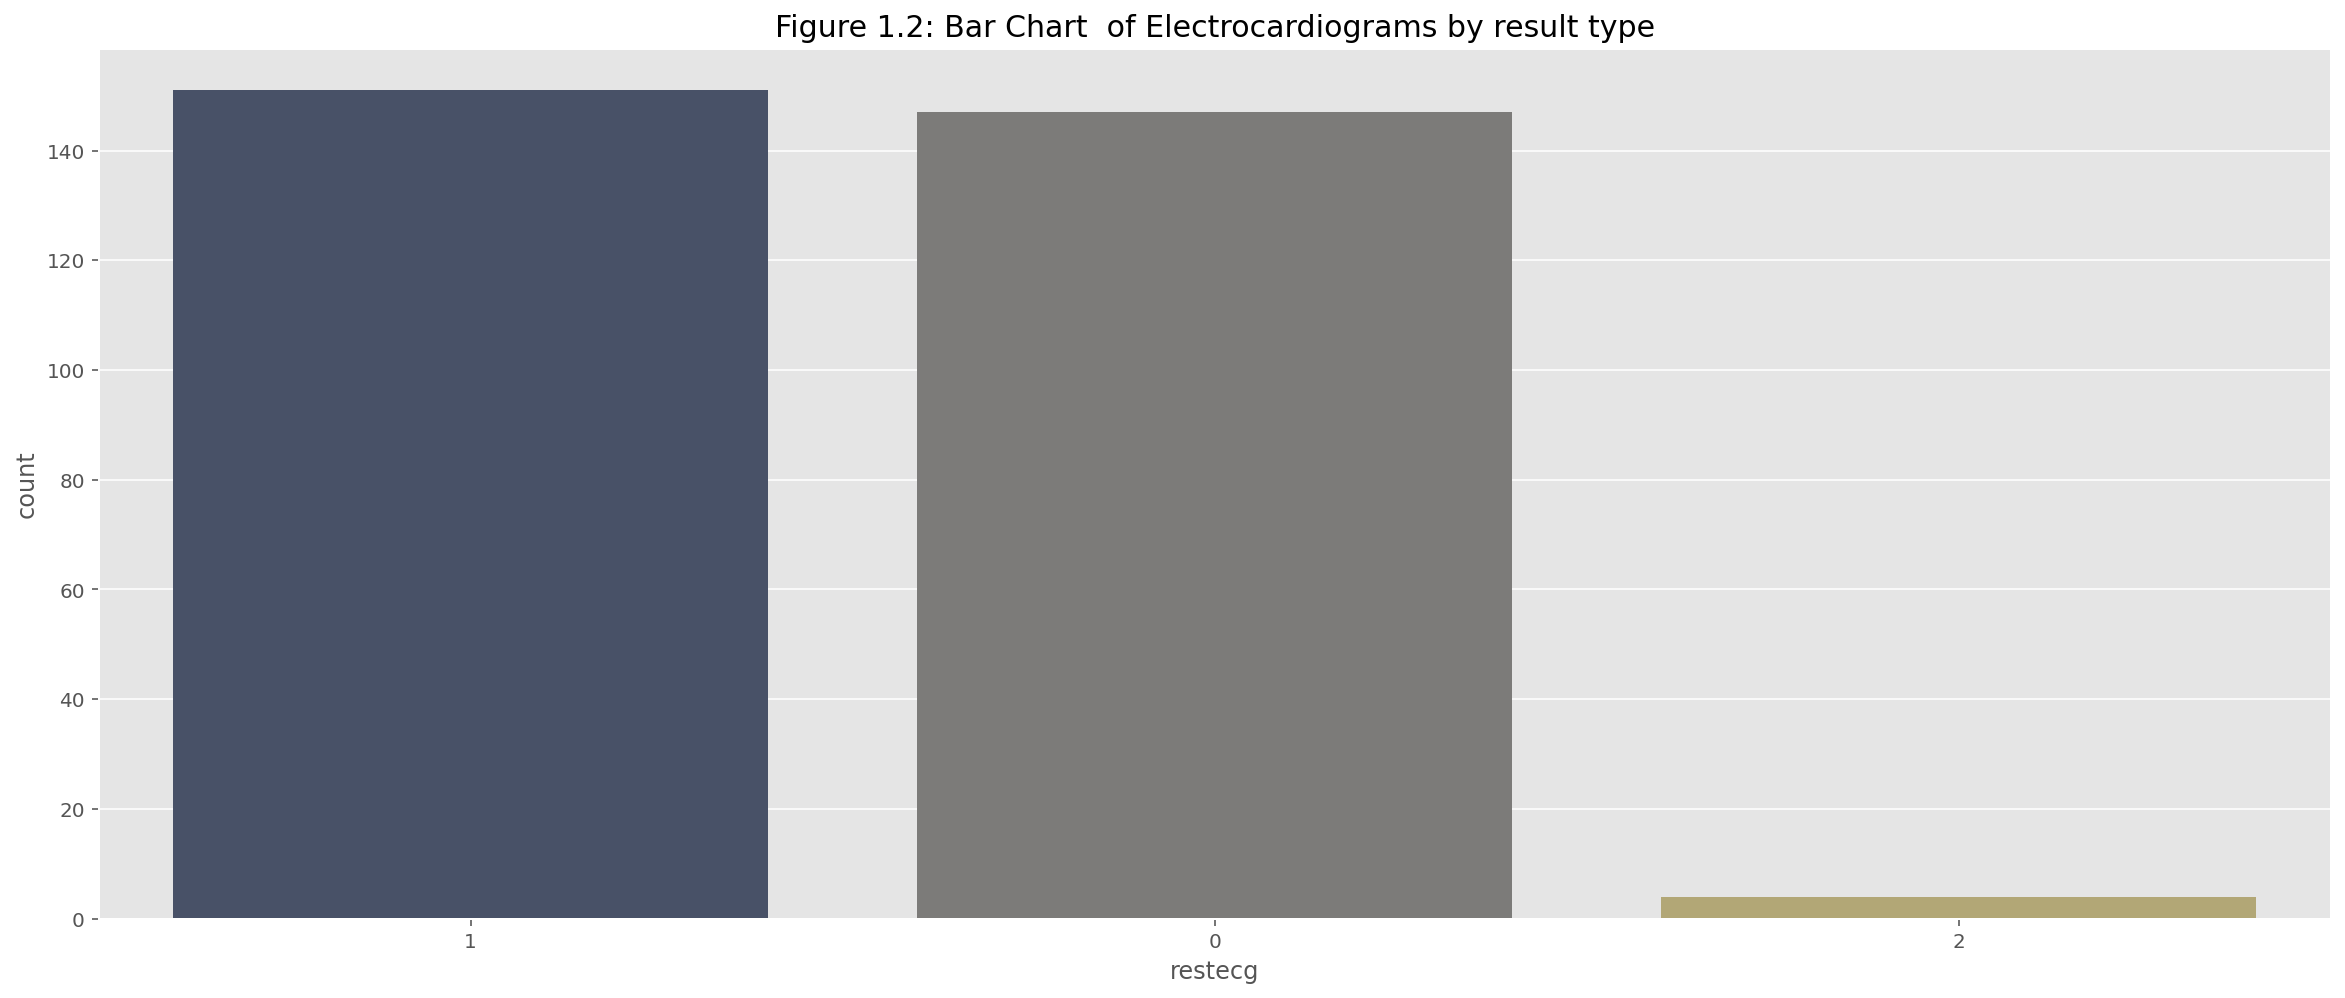

In [17]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'restecg', data = df, palette = 'cividis', 
                    order = df['restecg'].value_counts().index)
fig = plt.title('Figure 1.2: Bar Chart  of Electrocardiograms by result type', fontsize = 15)
plt.show()

#### Bar Chart of Chest Pain Type 

It is observed in Figure 1.3 that most patients, around 145, have had typical anginal chest pain. The second higher value corresponds to that of those who have not suffered a related anginal pain but suffered from chest pain sitting at 85 patients. The last 77 patients have had either an atypical anginal related pain or not a pain at all.

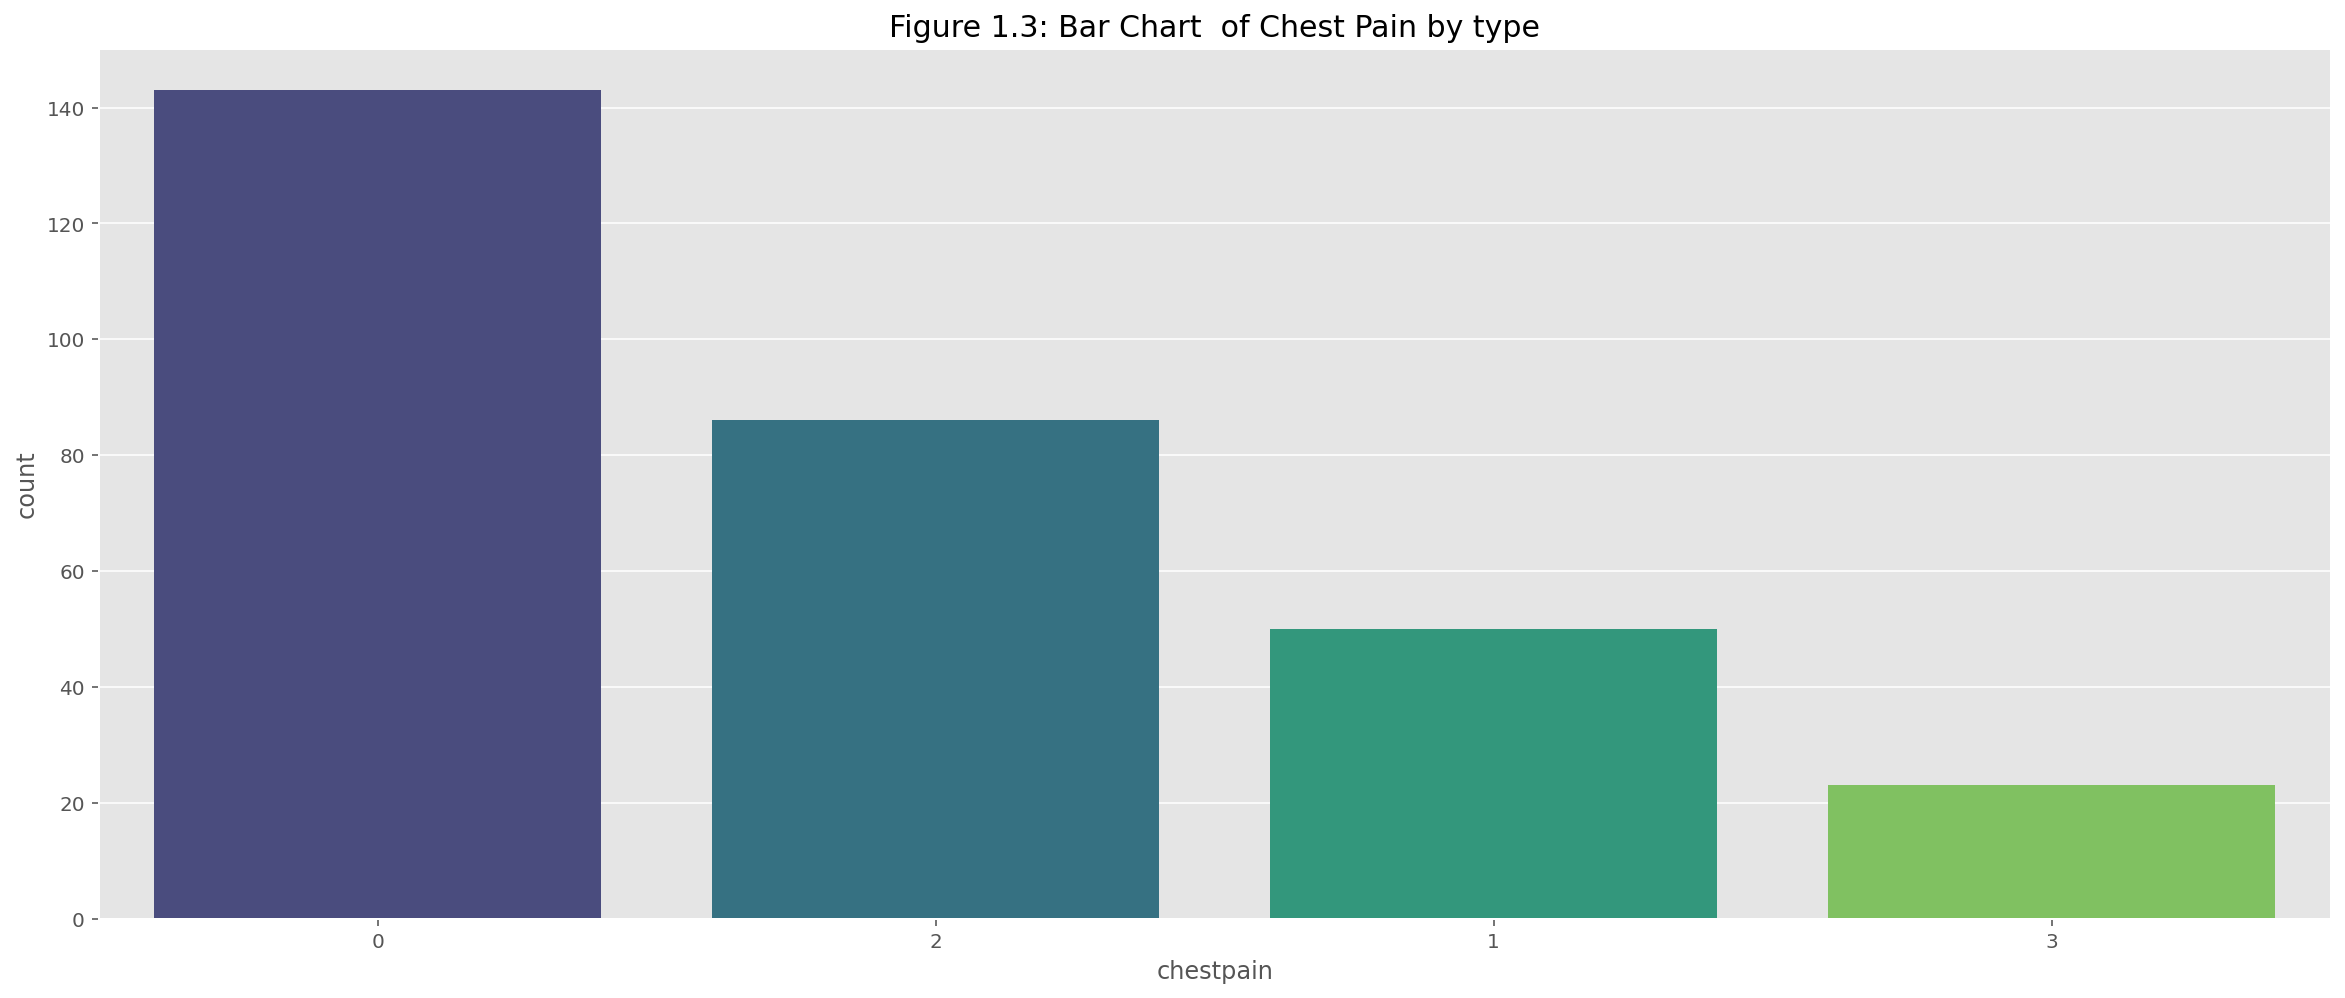

In [18]:
plt.figure(figsize = (20,8))
fig = sns.countplot(x = 'chestpain', data = df, palette = 'viridis', 
                    order = df['chestpain'].value_counts().index)
fig = plt.title('Figure 1.3: Bar Chart  of Chest Pain by type', fontsize = 15)
plt.show()

#### Boxplot & Histogram of Cholesterol

Most of the data falls between 240 to 270, with the medium sitting at 246, although there are some outliers above.

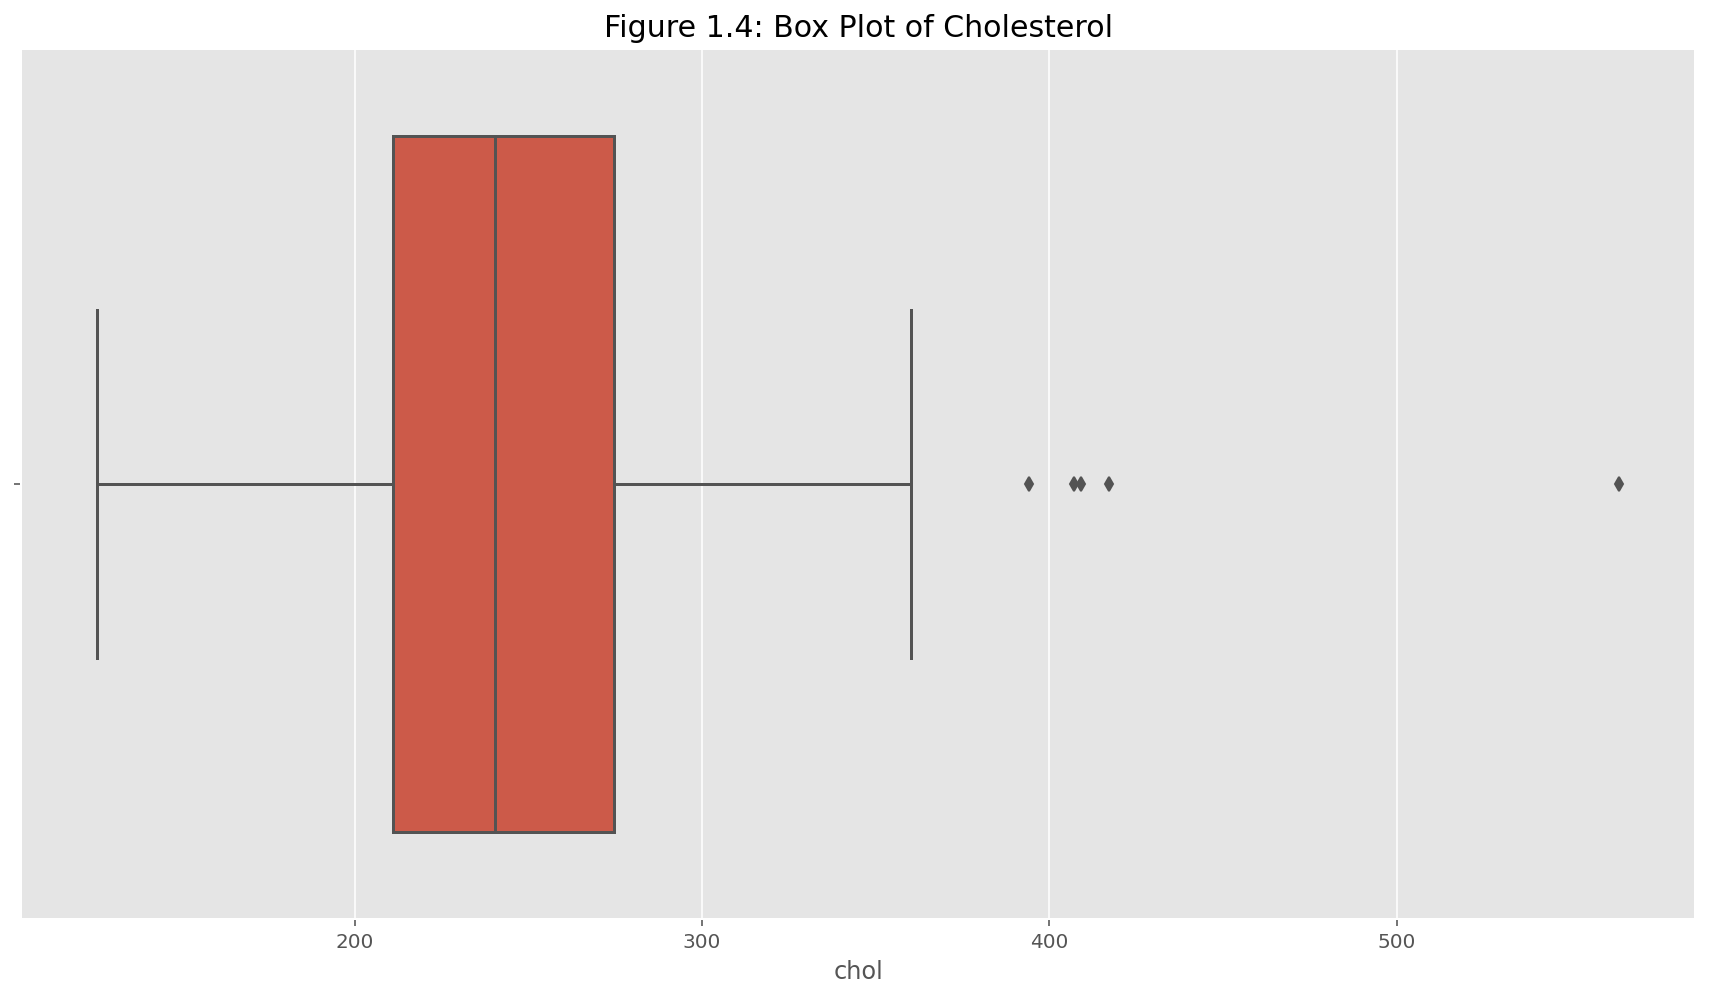

In [19]:
plt.figure(figsize = (15,8))
sns.boxplot(df['chol']).set_title('Figure 1.4: Box Plot of Cholesterol', fontsize = 15)
plt.show();

In [20]:
df['chol'].describe()

count    302.000000
mean     246.500000
std       51.753489
min      126.000000
25%      211.000000
50%      240.500000
75%      274.750000
max      564.000000
Name: chol, dtype: float64

### Two-Variable Visualisation <a id='Two-Variable-Visualisation'></a>

To gain some insight into the power of these attributes to discriminate between disease (num>0) and no disease (num=0), data is analyzed in order to look at their distributions over the corresponding subsamples, patients with disease, and without.

In [21]:
df['heartdisease'].value_counts()

1    164
0    138
Name: heartdisease, dtype: int64

#### Bar Chart of Sex  and Heart Disease outcome

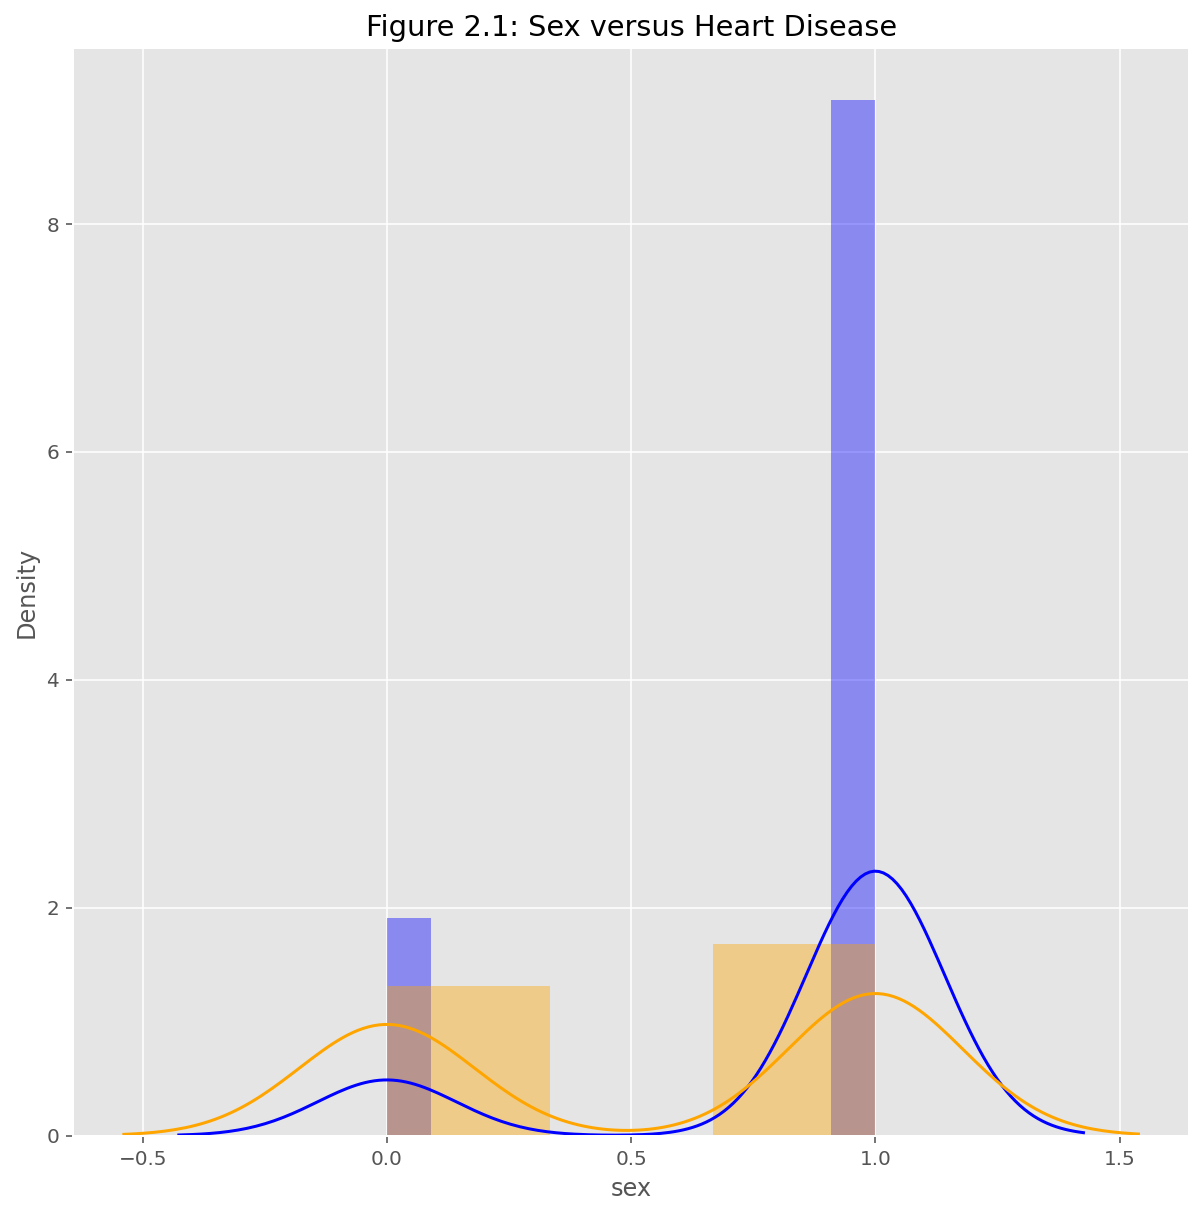

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['heartdisease'] == 0]['sex'], color = 'blue', kde = True,) 
sns.distplot(df[df['heartdisease'] == 1]['sex'], color ='orange', kde = True)
plt.title('Figure 2.1: Sex versus Heart Disease')
plt.show()

#### Bar Chart of Age and Heart Disease outcome

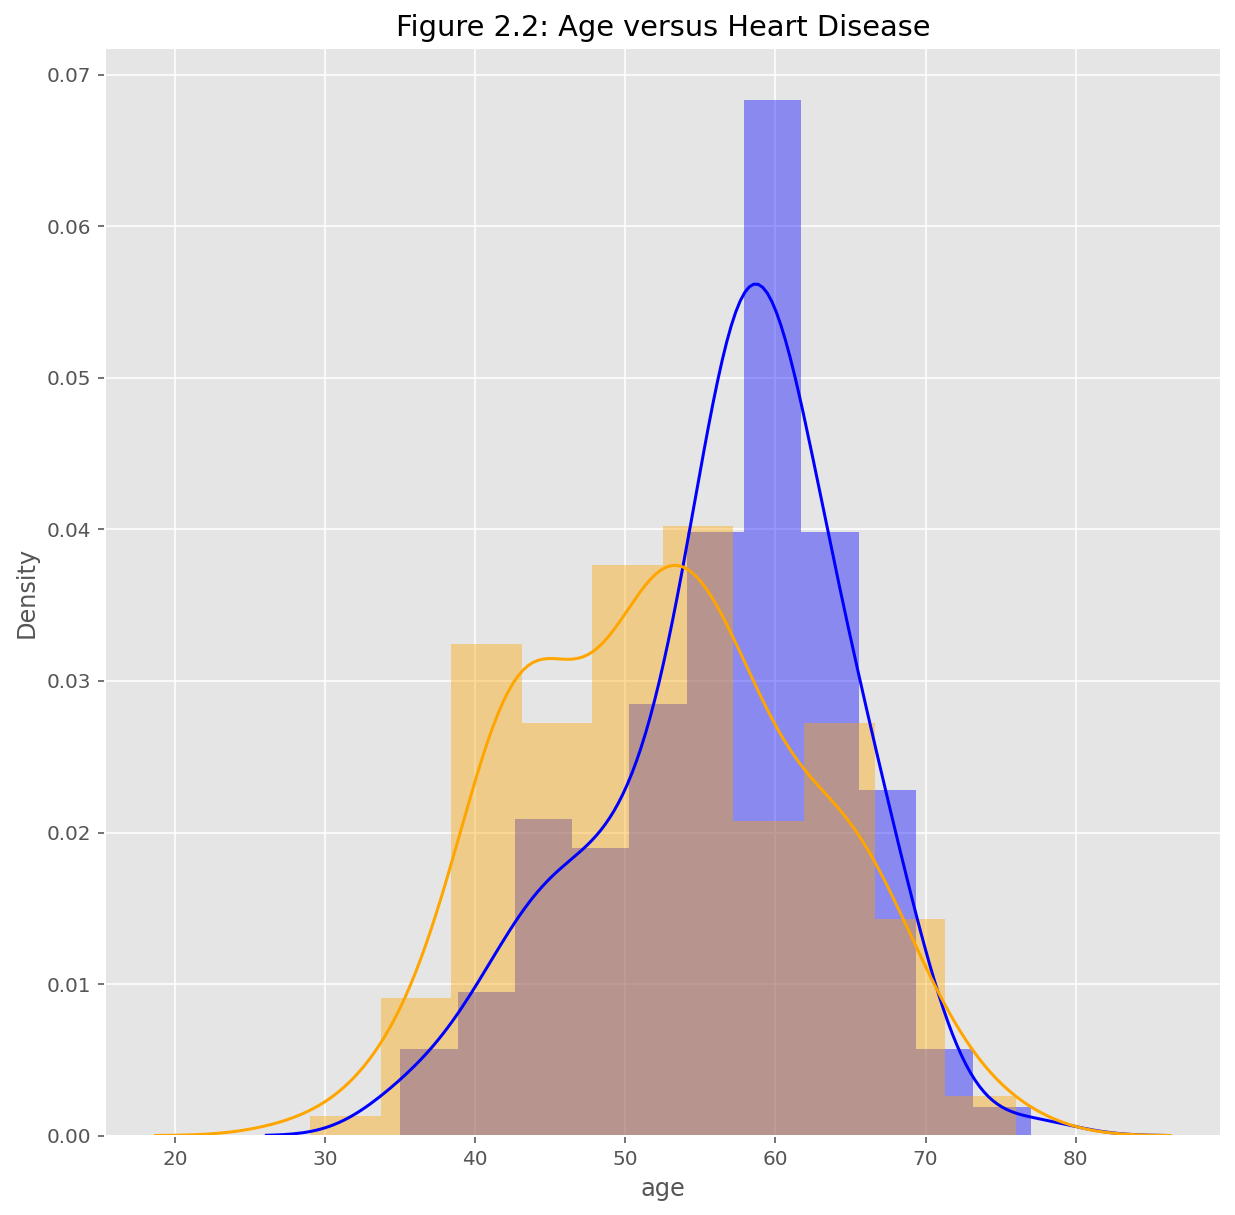

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['heartdisease'] == 0]['age'], color = 'blue', kde = True,) 
sns.distplot(df[df['heartdisease'] == 1]['age'], color ='orange', kde = True)
plt.title('Figure 2.2: Age versus Heart Disease')
plt.show()

#### Bar Chart of Cholesterol levels and Heart Disease outcome

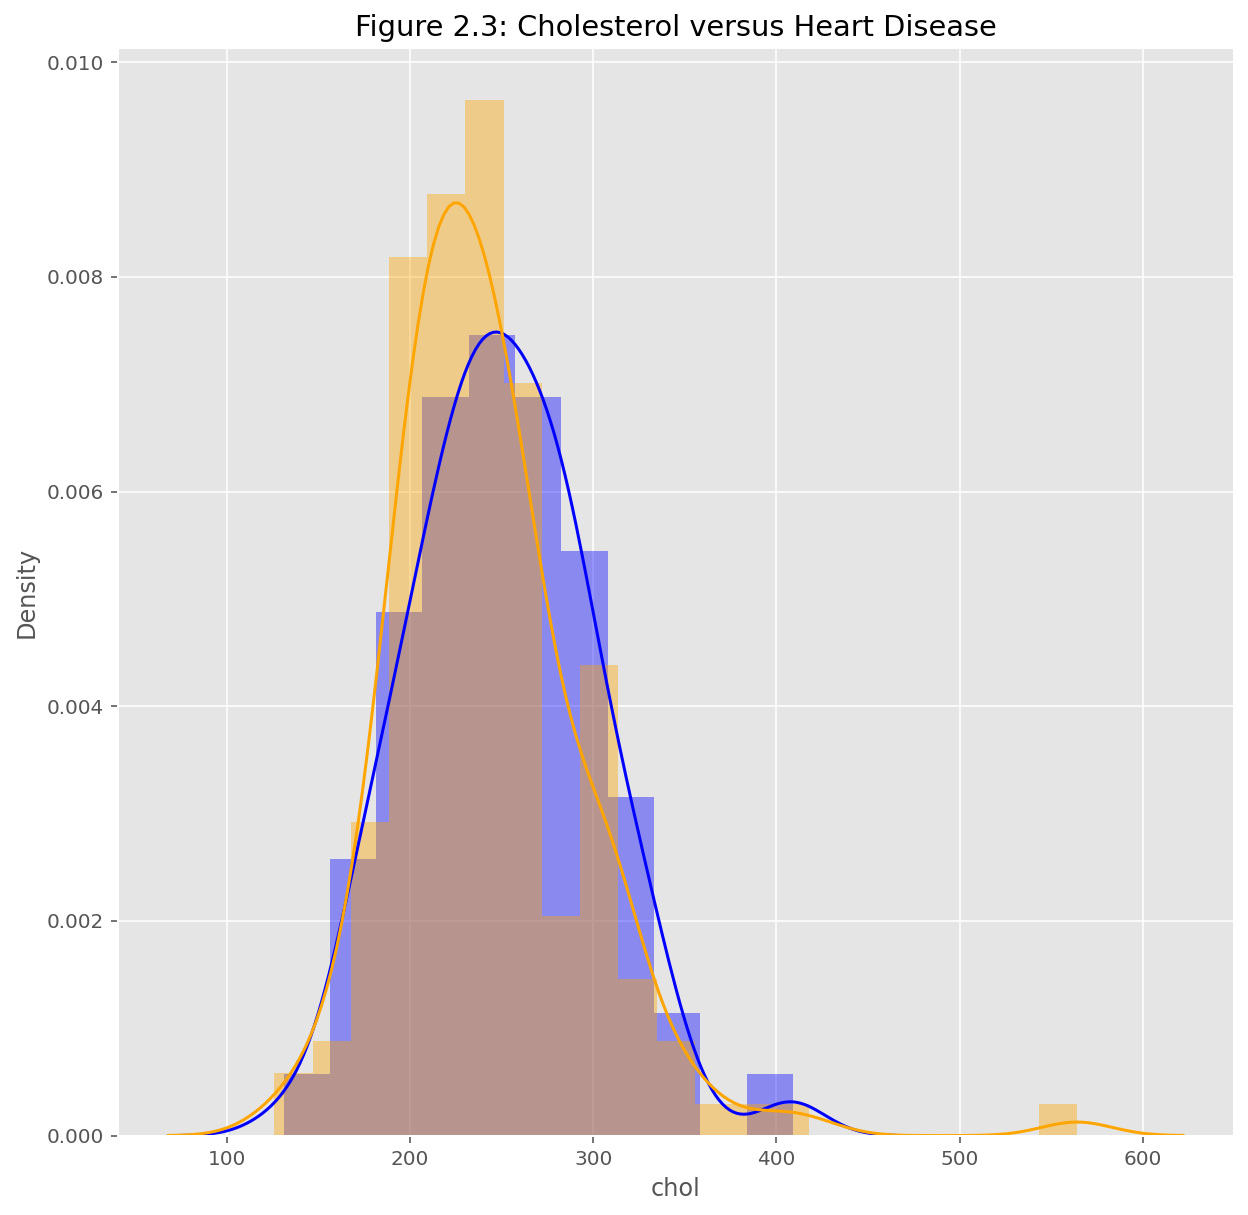

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['heartdisease'] == 0]['chol'], color = 'blue', kde = True,) 
sns.distplot(df[df['heartdisease'] == 1]['chol'], color ='orange', kde = True)
plt.title('Figure 2.3: Cholesterol versus Heart Disease')
plt.show()

#### Bar Chart of Exercise-induced angina and Heart Disease outcome

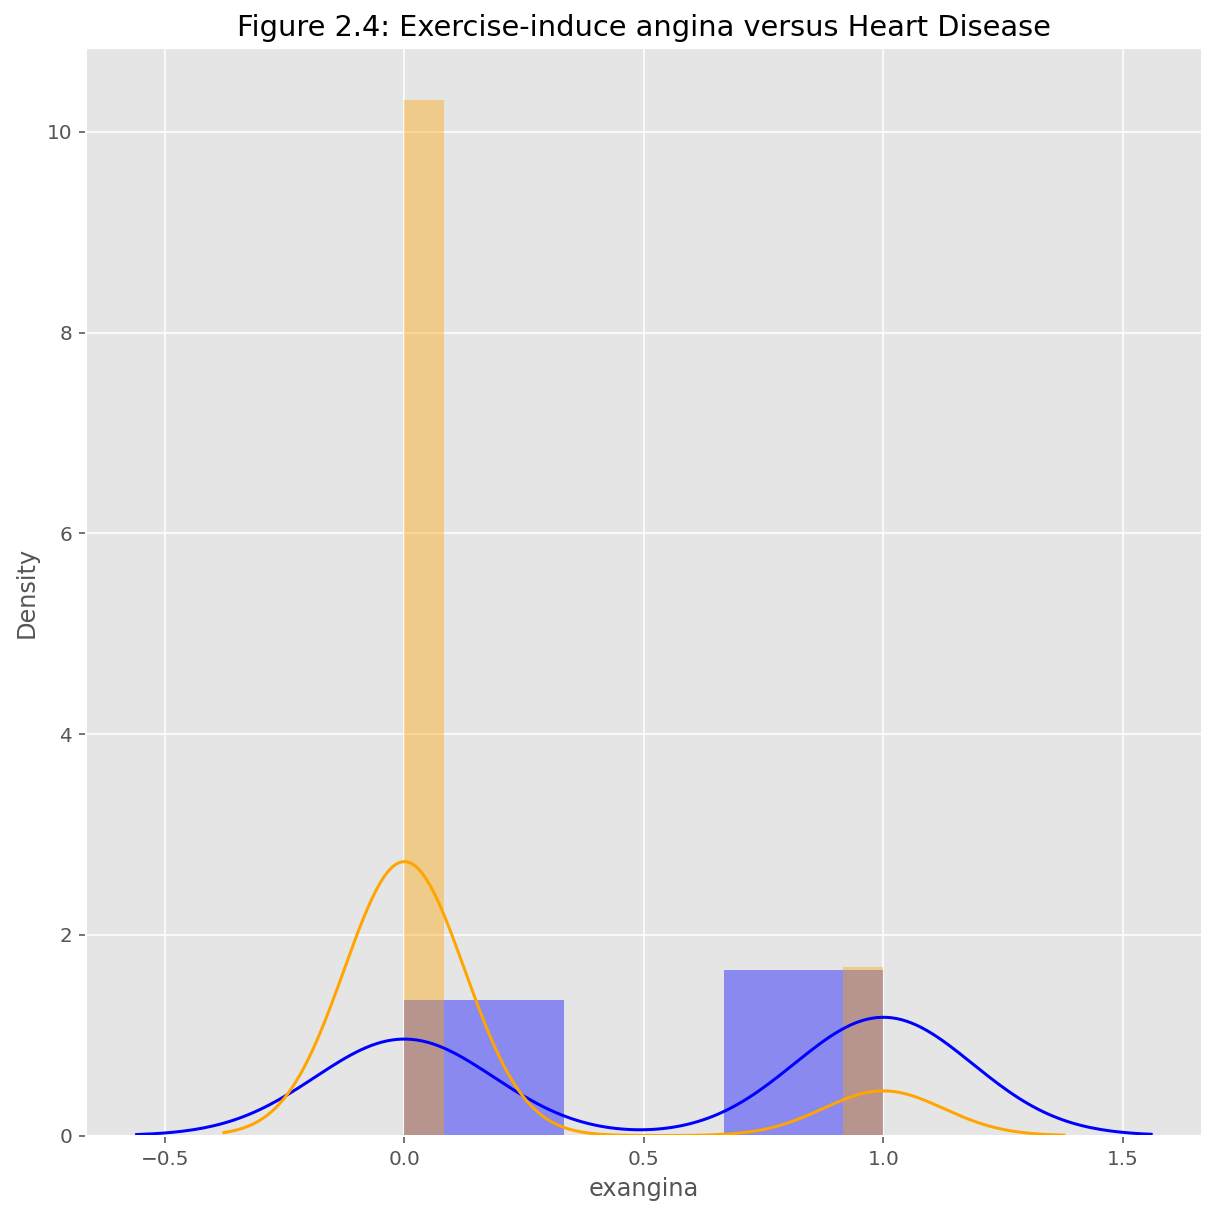

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['heartdisease'] == 0]['exangina'], color = 'blue', kde = True,) 
sns.distplot(df[df['heartdisease'] == 1]['exangina'], color ='orange', kde = True)
plt.title('Figure 2.4: Exercise-induce angina versus Heart Disease')
plt.show()

#### Bar Chart of Chest Pain levels and Heart Disease outcome

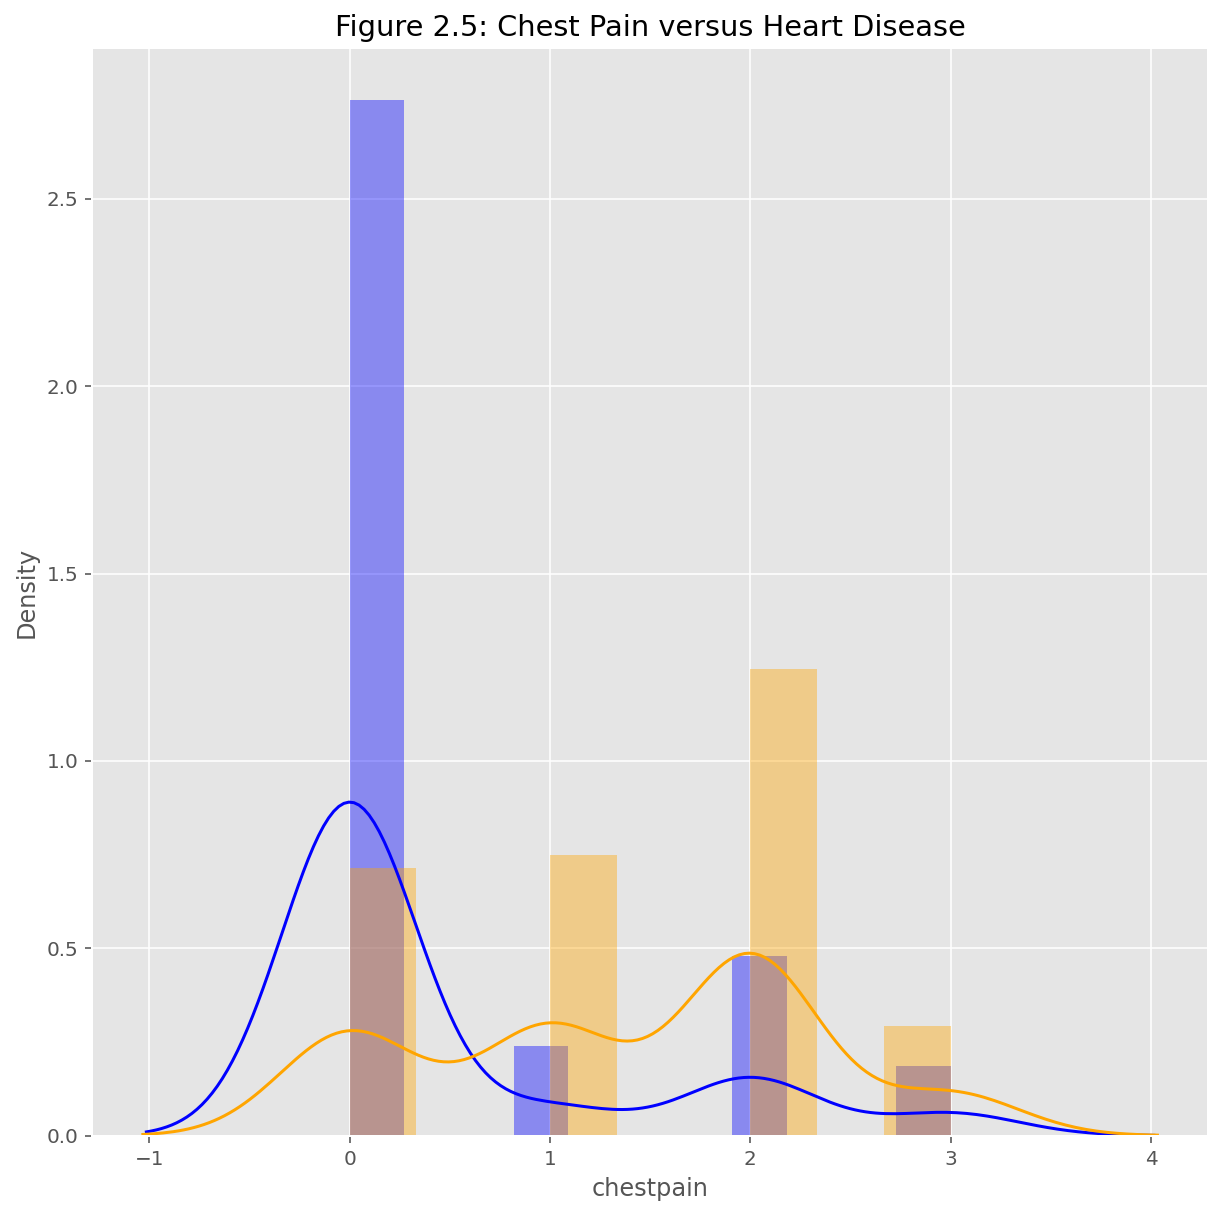

In [27]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['heartdisease'] == 0]['chestpain'], color = 'blue', kde = True,) 
sns.distplot(df[df['heartdisease'] == 1]['chestpain'], color ='orange', kde = True)
plt.title('Figure 2.5: Chest Pain versus Heart Disease')
plt.show()

#### Scatterplot of Age and Maximum heart rate achieved

In Figure 2.1 there seems to be a negative association between age and maximum heart rate achieved.

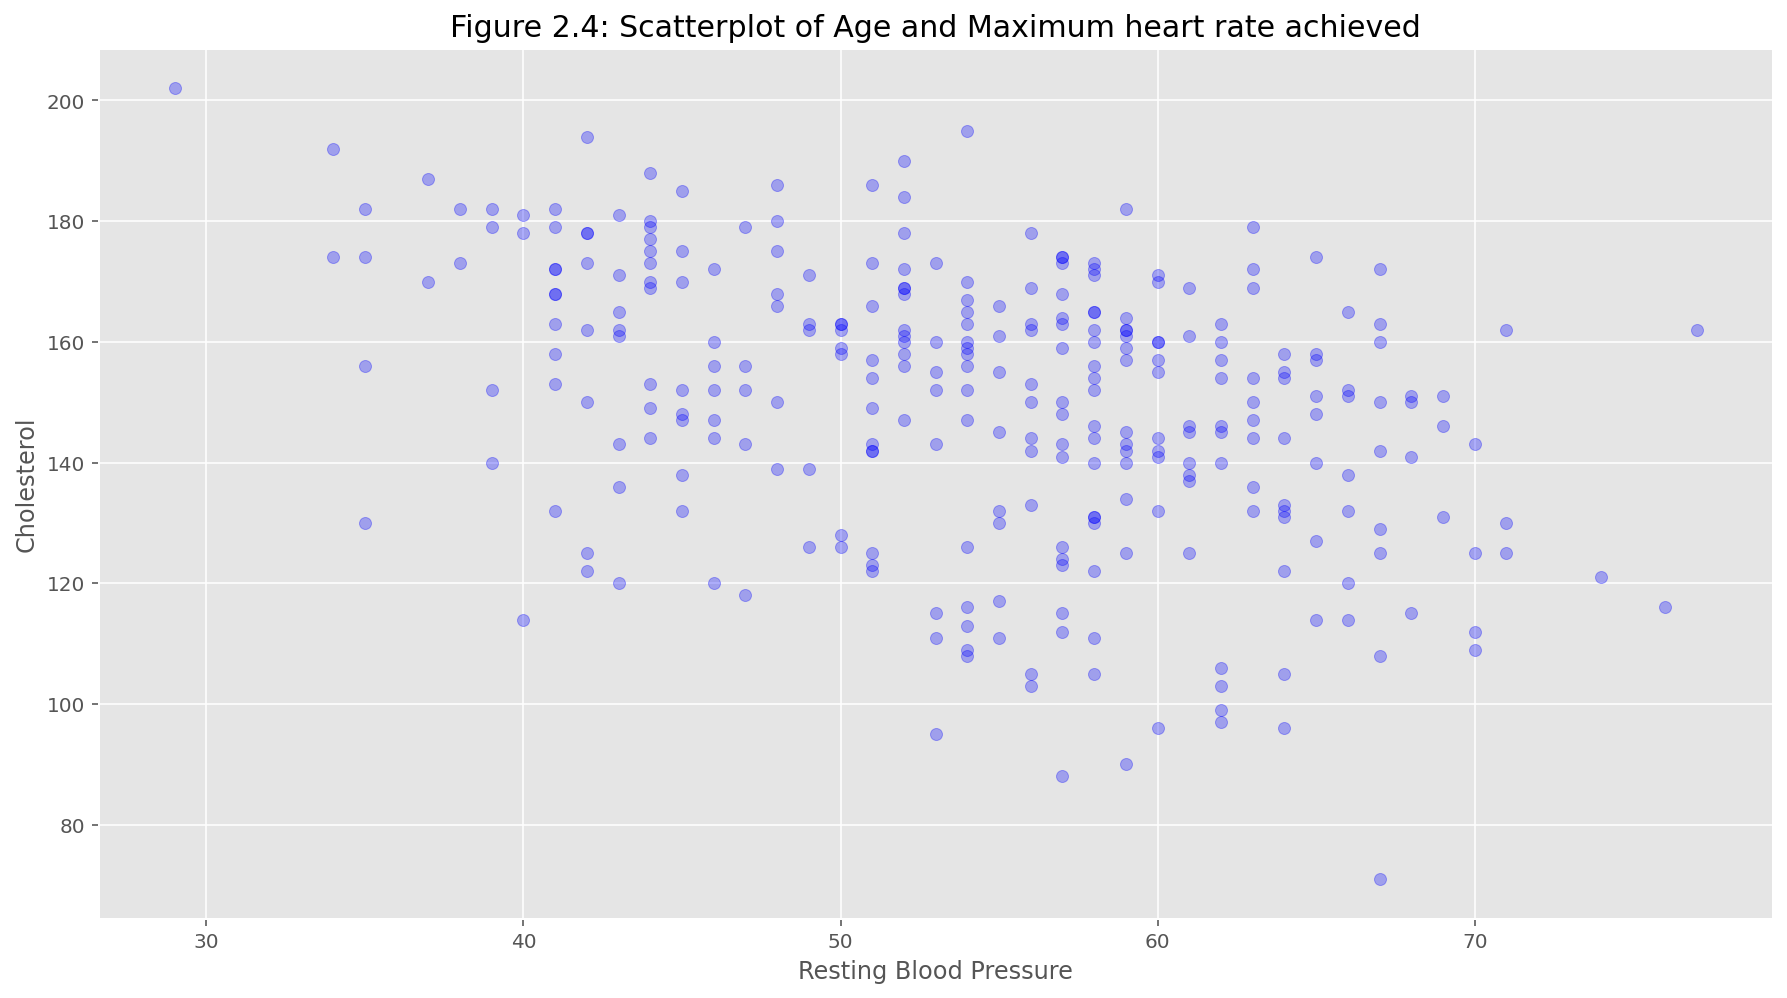

In [27]:
plt.figure(figsize = (15,8))
plt.scatter(df['age'], df['maxhr'], color = 'blue', alpha = 0.3)
plt.title('Figure 2.4: Scatterplot of Age and Maximum heart rate achieved', fontsize = 15)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.show();

#### Scatterplot of Age and Resting Blood Pressure

In Figure 2.2 there seems to be a positive association between age and resting blood pressure. 

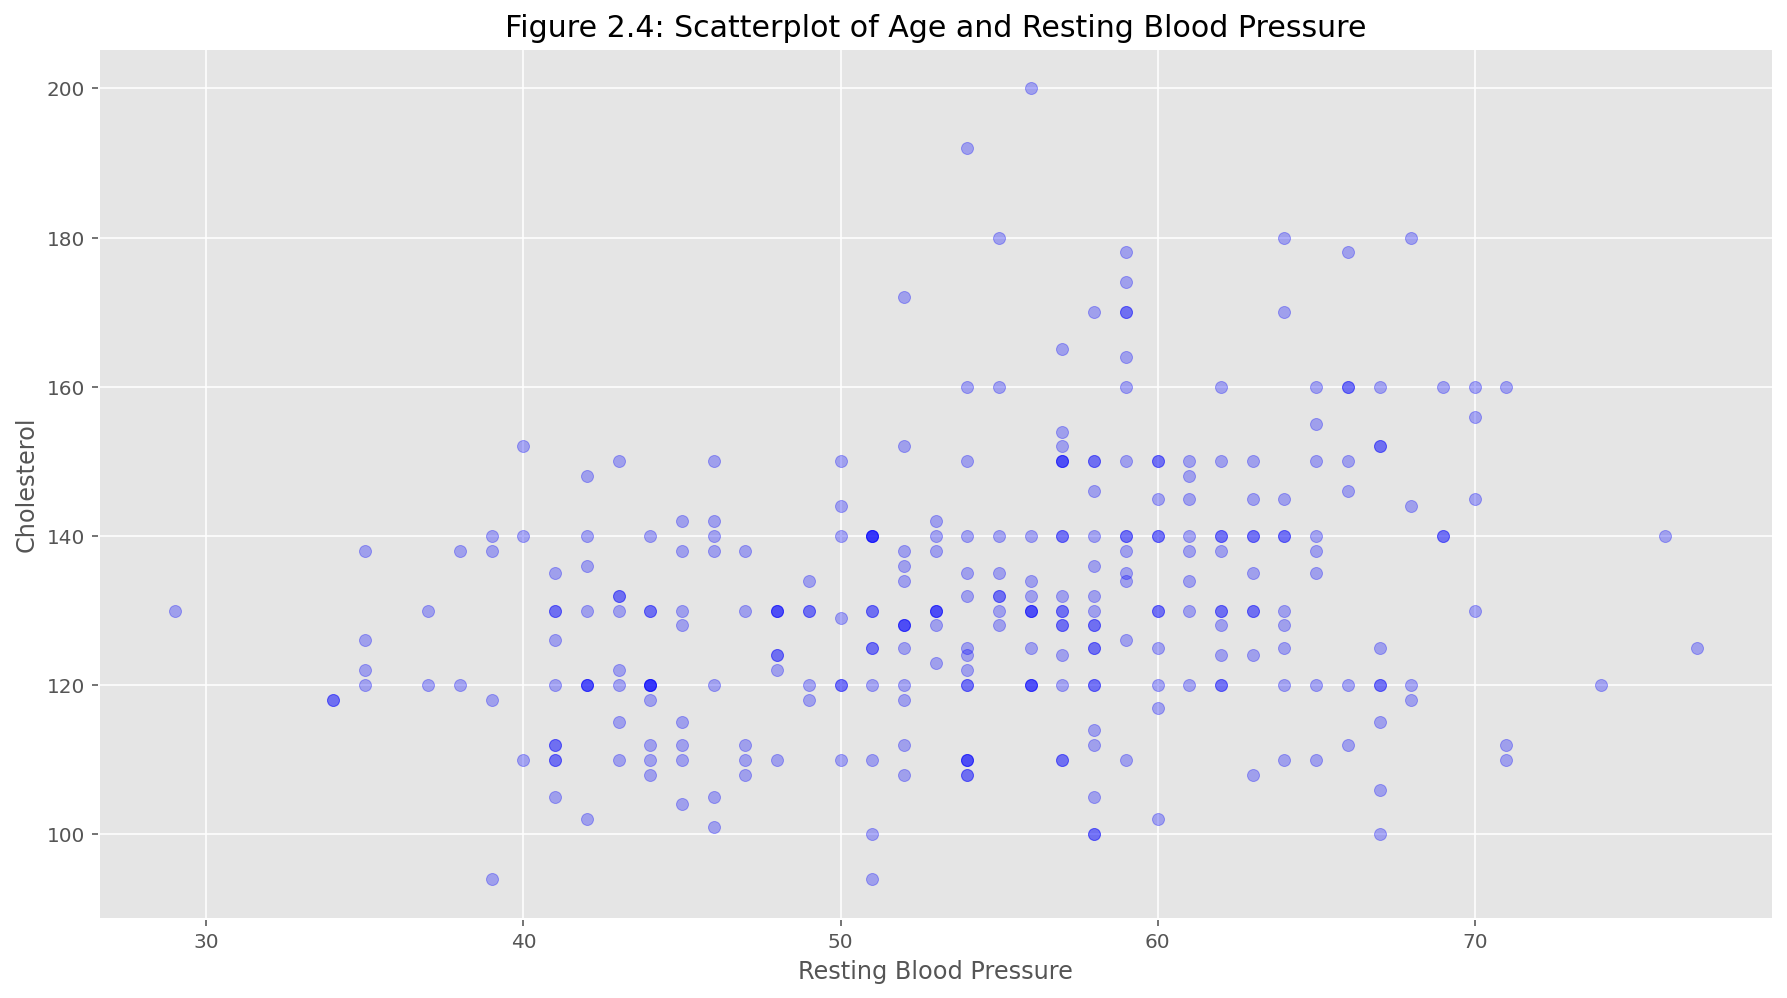

In [28]:
plt.figure(figsize = (15,8))
plt.scatter(df['age'], df['restbp'], color = 'blue', alpha = 0.3)
plt.title('Figure 2.4: Scatterplot of Age and Resting Blood Pressure', fontsize = 15)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.show();

### Multi-Variable Visualisation <a id='Multi-Variable-Visualisation'></a>


#### Clusterplot of data types correlation shown on the form of a heatmap

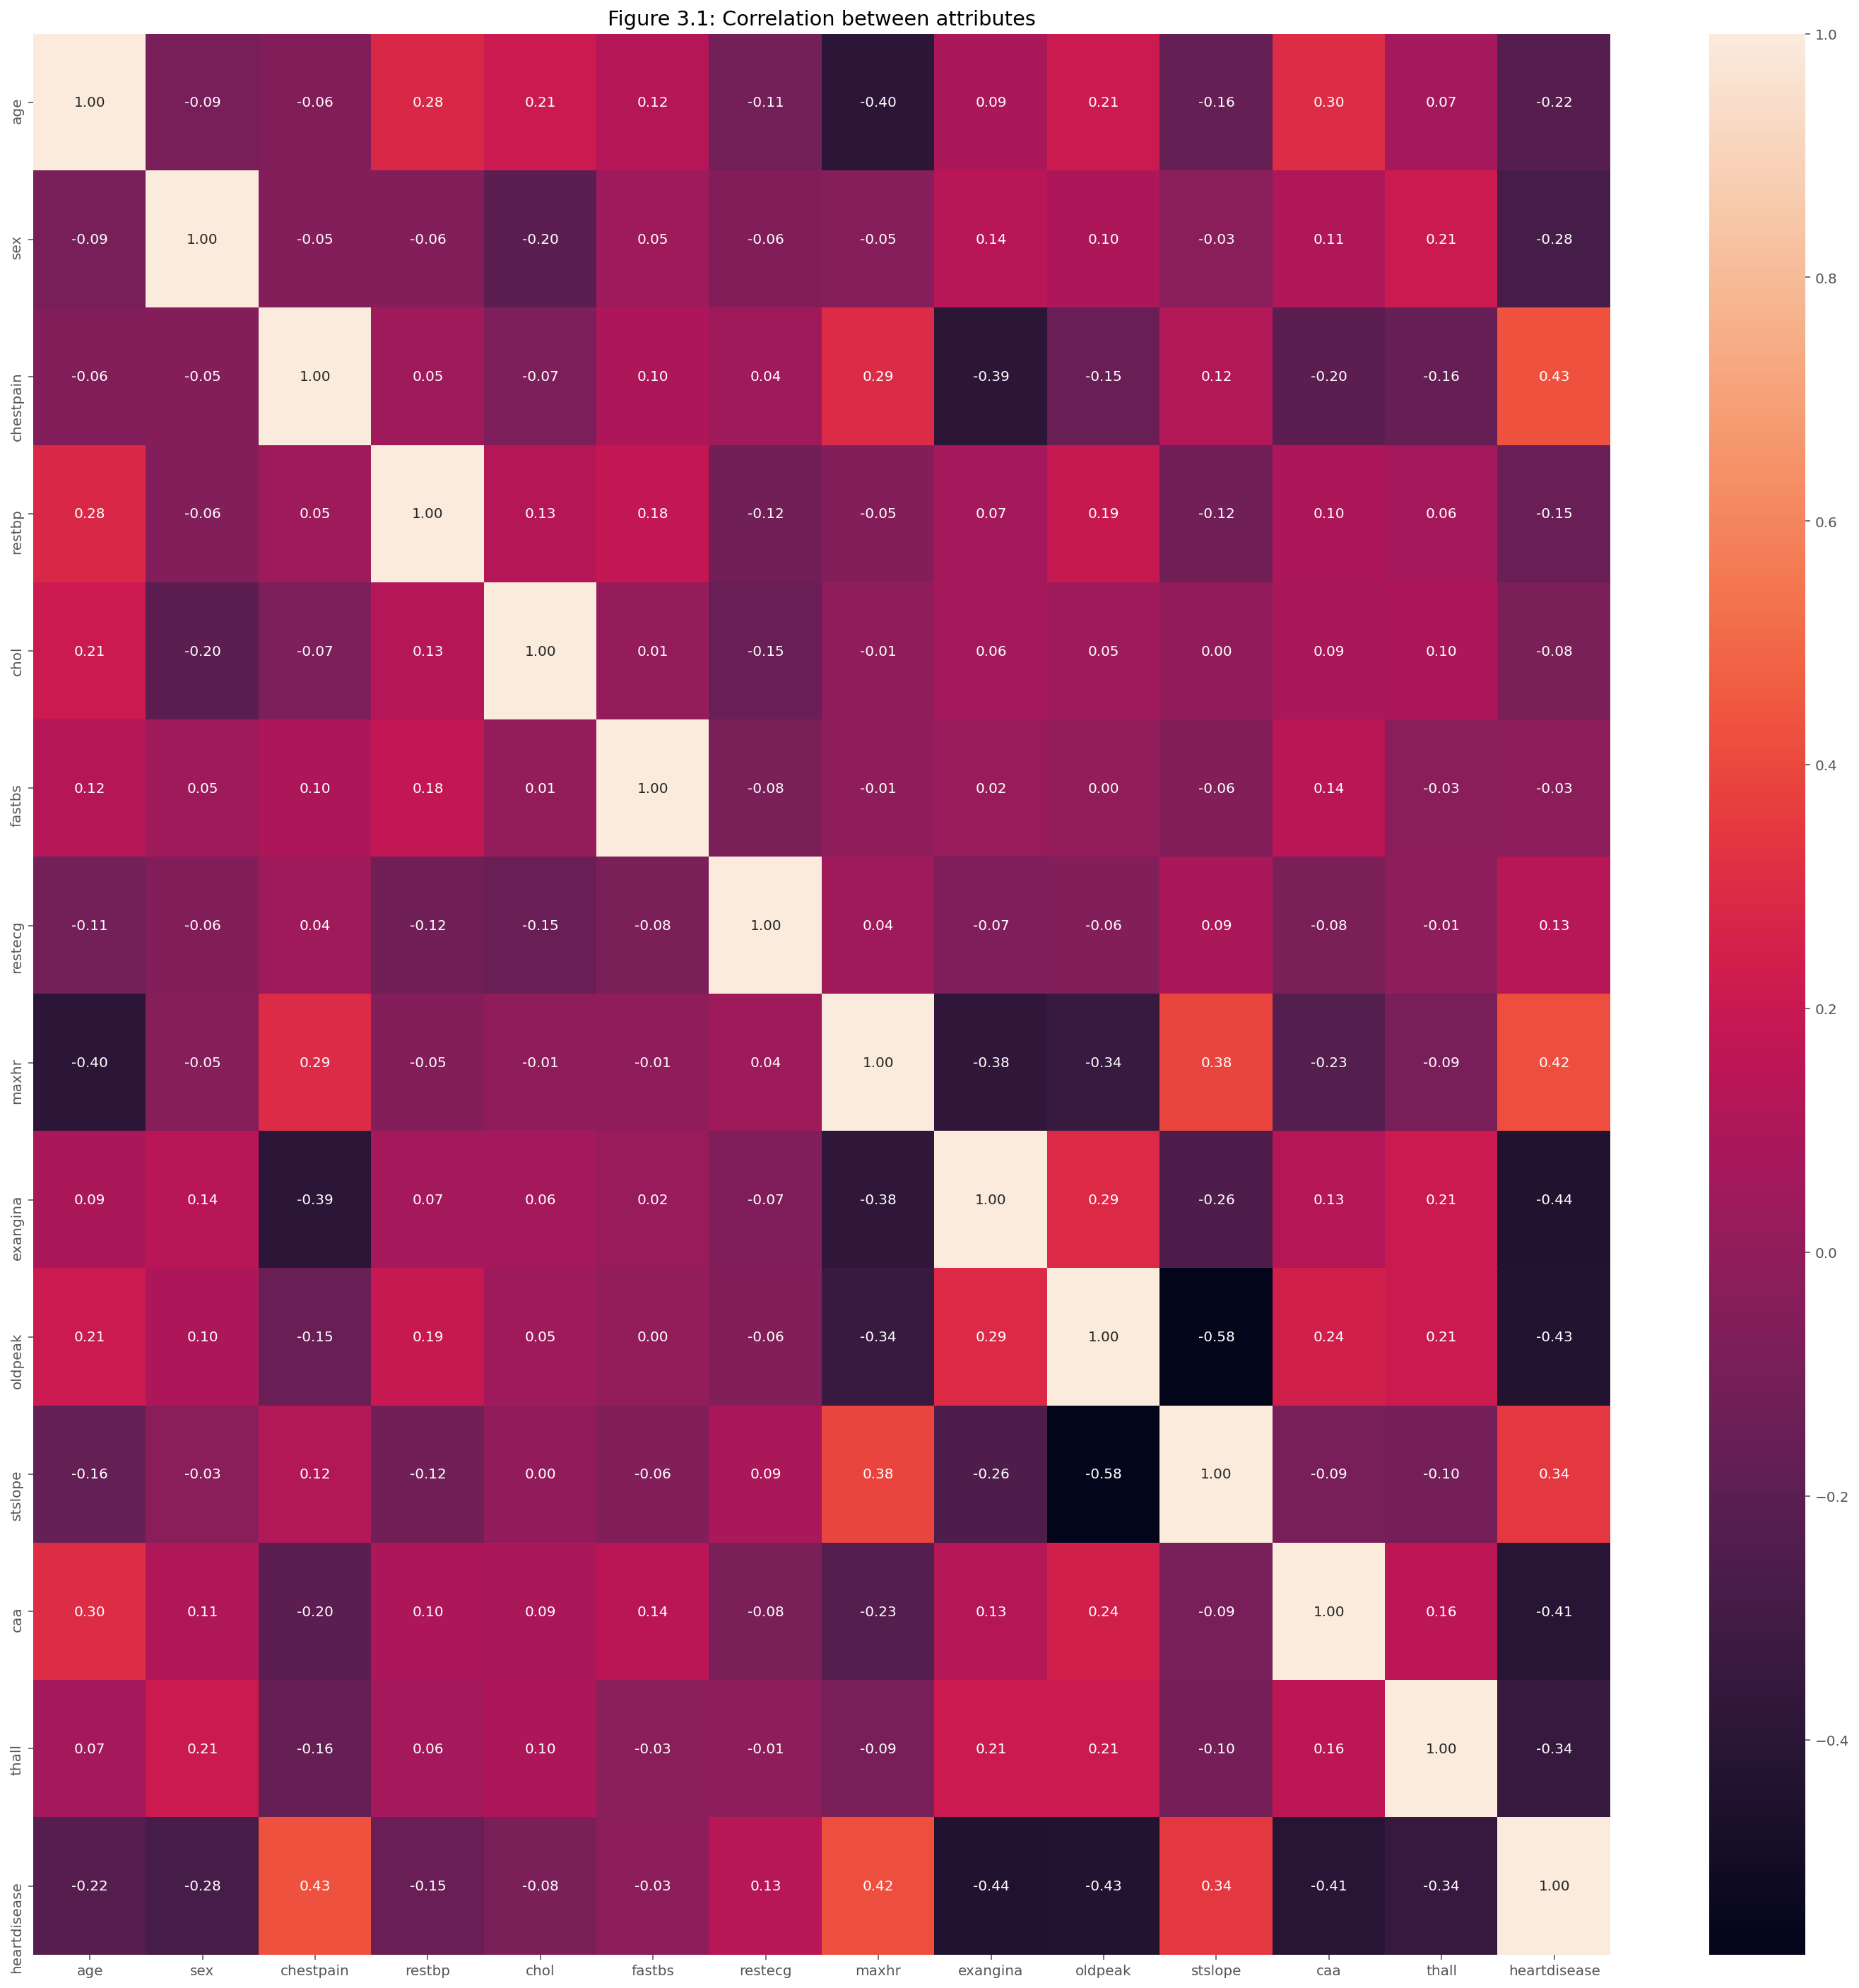

In [29]:
corr = df.corr()
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True, cmap ='rocket', fmt = '.2f')
plt.title('Figure 3.1: Correlation between attributes')
plt.show()

#### Clusterplot of data types correlation shown on the form of a pairplot

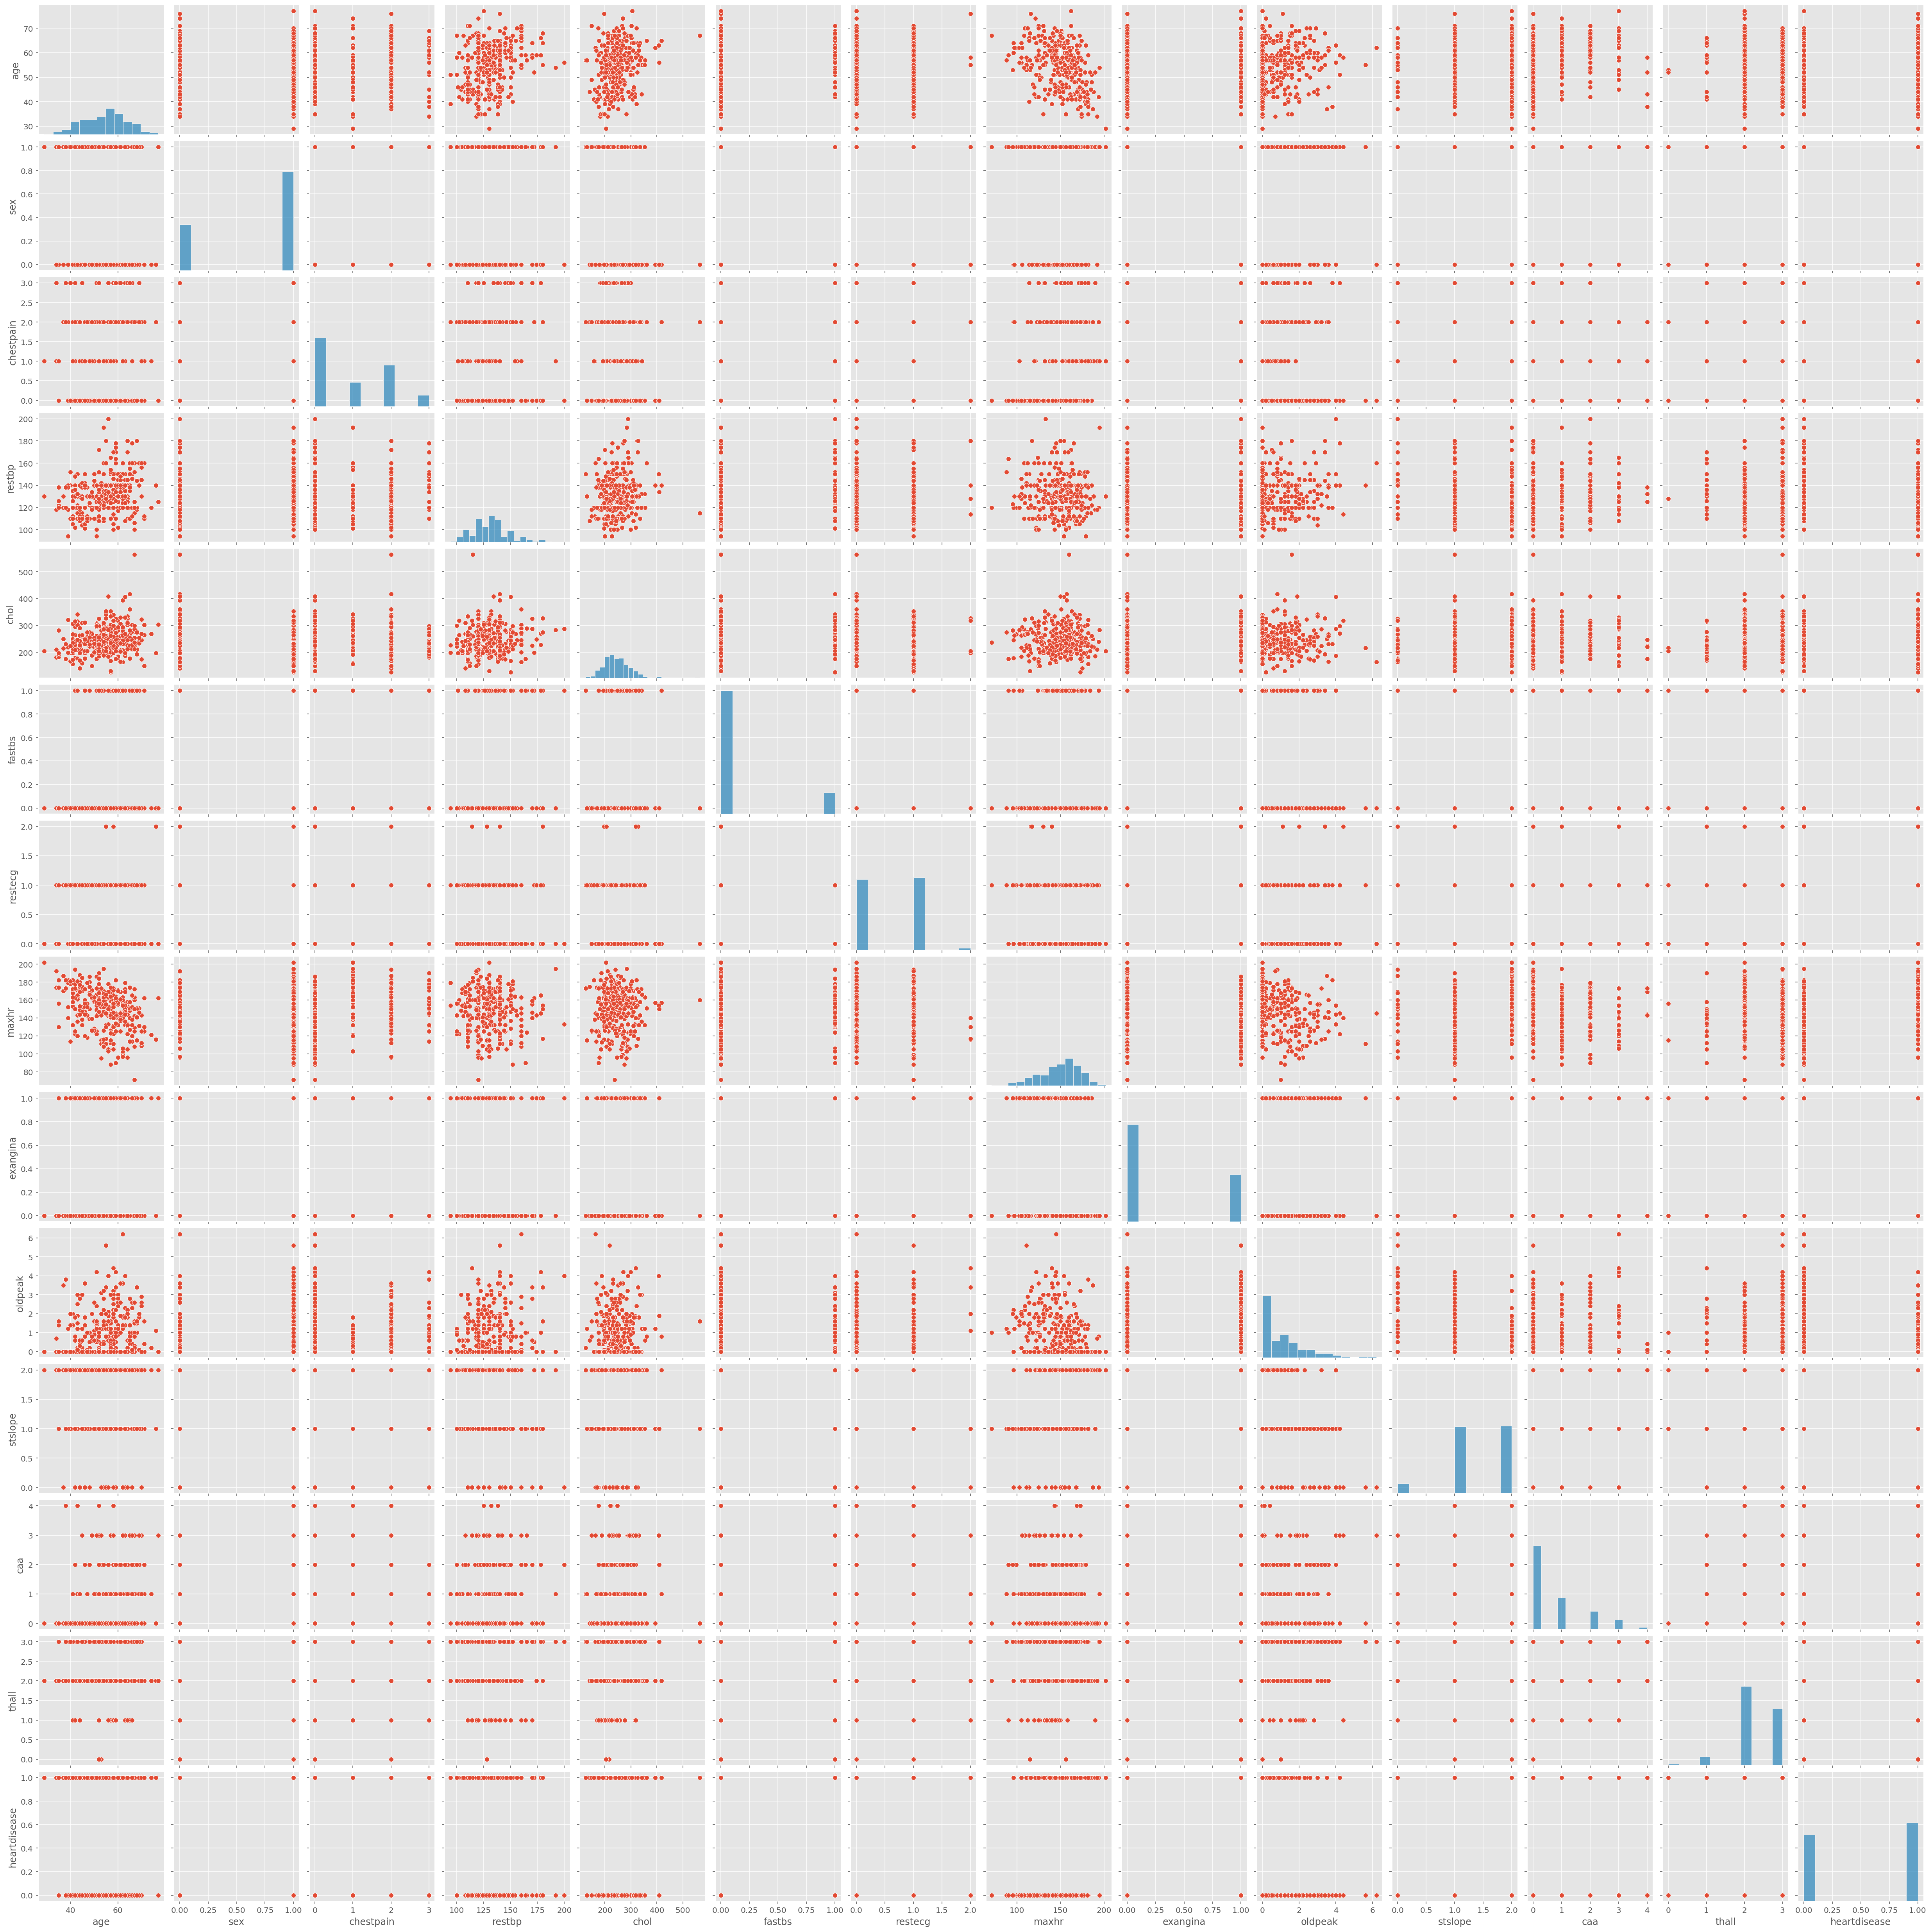

In [30]:
sns.pairplot(df)

#### Violin plot of few variables versus Heart Disease

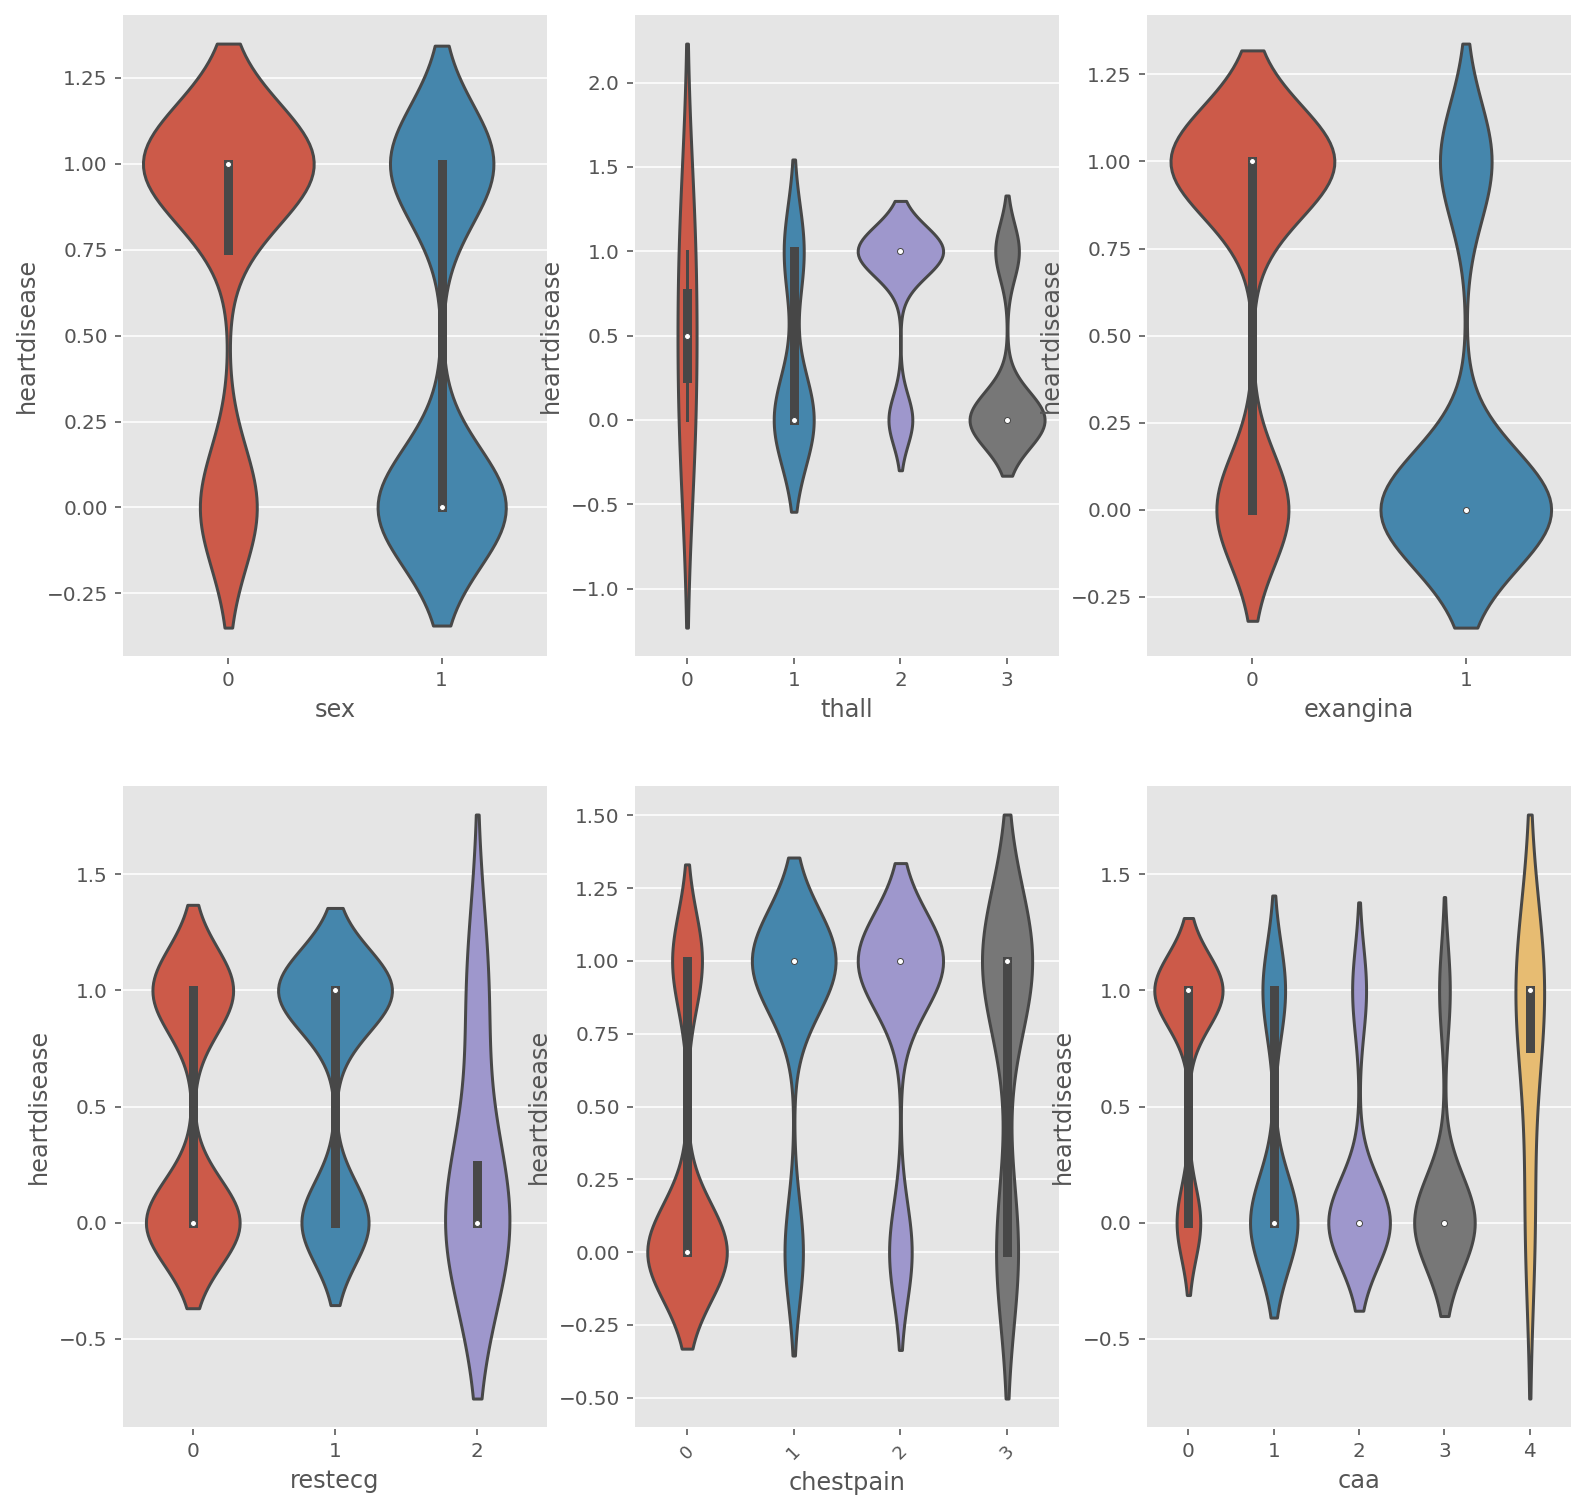

In [31]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'heartdisease', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'heartdisease', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'exangina', y = 'heartdisease', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'heartdisease', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'chestpain', y = 'heartdisease', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'caa', y = 'heartdisease', data = df)

plt.show()

#### 
## Summary and conclusions <a id='Summary-and-Conclusions'></a>
***
  

Those people with cardiovascular disease or who are at high cardiovascular risk need early detection and management wherein a machine learning model can be of great help. This where this linear regression model can be used to help hospitals in assessing the severity of patients with cardiovascular diseases, stop avoidable deaths and narrow dawon the key factor that lead to heart disease. 
   
Throughout this regression model, several data visualizations were created to allow to get some insight about which features would be valuable for inclusion in a machine learning model. An approach to quantify some degree of accuracy and understand the dataset, data features were examinated versus the target feature, measuring the discrepancy between the “disease” and “no-disease” distributions for each attribute. 

An obvious statement extracted from Figure 2.1 could be to claim that older males are more prone to suffer of heart disease. These histograms show with various degrees that people with heart disease tend to be older, have higher blood pressure, higher cholesterol levels, as well as lower maximum heart rate under the Thalium stress test than people without the disease. These results allow to get some insight about which features would be valuable for inclusion in a machine learning model, but it should be remembered that they do not take correlations into account. Thus they are more useful as a benchmark, or to answer the question of which test one should choose if one had the resources to perform only one.


#### 
## References <a id='References'></a>
***
  
- Rashik Rahman. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. This dataset can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

    
- Creators: Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D..; University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.; University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.; V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.; Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779.

***